# Plots for Features Importance of Logit Regression Model: `/r/PC` and `/r/PCM`
- To replicate: **Figure 6**, **Figure B.7**

In [1]:
# Packages
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path += ['../']

from config import processed_data_path, raw_data_path, figure_path

# Parameters
SUBREDDITS = {
    'PoliticalCompass': 'PC',
    'PoliticalCompassMemes': 'PCM'
}

DATA_PATH = processed_data_path
FIGURES_PATH = figure_path

# Plots
sns.set_context('talk', rc={'font.size': 14.0,
                            'axes.labelsize': 14.0,
                            'axes.titlesize': 14.0,
                            'xtick.labelsize': 12.0,
                            'ytick.labelsize': 12.0,
                            'legend.fontsize': 12.0,
                            'legend.title_fontsize': 16.0,
                            'patch.linewidth': 1.5,
                            'font.family': 'serif',
                            'font.serif': 'Linux Libertine O',
                           }
               )

# Colors
blu, orange, green, *_ = sns.color_palette()
typecolors = {
    'Homo_Economic': blu, 
    'Hete_Economic': blu, 
    'Hete_Economic_Source_Left': blu, 
    'Homo_Social': blu, 
    'Hete_Social': blu, 
    'Hete_Social_Source_Lib': blu,
    'Symmetric_Young_Old': orange,
    'Symmetric_Young_Male': orange,
    'Symmetric_Young_Female': orange,
    'Symmetric_Young_Poor': orange,
    'Symmetric_Young_Rich': orange,
    'Symmetric_Old_Male': orange,
    'Symmetric_Old_Female': orange,
    'Symmetric_Old_Poor': orange,
    'Symmetric_Old_Rich': orange,
    'Symmetric_Male_Female': orange,
    'Symmetric_Male_Poor': orange,
    'Symmetric_Male_Rich': orange,
    'Symmetric_Female_Poor': orange,
    'Symmetric_Female_Rich': orange,
    'Symmetric_Poor_Rich': orange,
    'Symmetric_Young_Young': orange,
    'Symmetric_Old_Old': orange,
    'Symmetric_Male_Male': orange,
    'Symmetric_Female_Female': orange,
    'Symmetric_Poor_Poor': orange,
    'Symmetric_Rich_Rich': orange,
    'Target_is_popular': green,
    'Target_is_not_popular': green
}

features_names = {
    'Homo_Economic': 'Homophily (economic)', 
    'Hete_Economic': 'Heterophily (economic)', 
    'Hete_Economic_Source_Left': r'Heterophily (Left $\to$)', 
    'Homo_Social': r'Homophily (social)', 
    'Hete_Social': r'Heterophily (social)', 
    'Hete_Social_Source_Lib': r'Heterophily (Lib $\to$)',
    'Symmetric_Young_Old': r'Young $\leftrightarrow$ Old',
    'Symmetric_Young_Male': r'Young $\leftrightarrow$ Male',
    'Symmetric_Young_Female': r'Young $\leftrightarrow$ Female',
    'Symmetric_Young_Poor': r'Young $\leftrightarrow$ Poor',
    'Symmetric_Young_Rich': r'Young $\leftrightarrow$ Rich',
    'Symmetric_Old_Male': r'Old $\leftrightarrow$ Male',
    'Symmetric_Old_Female': r'Old $\leftrightarrow$ Female',
    'Symmetric_Old_Poor': r'Old $\leftrightarrow$ Poor',
    'Symmetric_Old_Rich': r'Old $\leftrightarrow$ Rich',
    'Symmetric_Male_Female': r'Male $\leftrightarrow$ Female',
    'Symmetric_Male_Poor': r'Male $\leftrightarrow$ Poor',
    'Symmetric_Male_Rich': r'Male $\leftrightarrow$ Rich',
    'Symmetric_Female_Poor': r'Female $\leftrightarrow$ Poor',
    'Symmetric_Female_Rich': r'Female $\leftrightarrow$ Rich',
    'Symmetric_Poor_Rich': r'Poor $\leftrightarrow$ Rich',
    'Symmetric_Young_Young': r'Young $\leftrightarrow$ Young',
    'Symmetric_Old_Old': r'Old $\leftrightarrow$ Old',
    'Symmetric_Male_Male': r'Male $\leftrightarrow$ Male',
    'Symmetric_Female_Female': r'Female $\leftrightarrow$ Female',
    'Symmetric_Poor_Poor': r'Poor $\leftrightarrow$ Poor',
    'Symmetric_Rich_Rich': r'Rich $\leftrightarrow$ Rich',
    'Target_is_popular': r'Target is popular',
    'Target_is_not_popular': r'Target is not popular'
}

In [2]:
df = {}
toplot = {}

for S in SUBREDDITS:
    df[S] = pd.read_csv(DATA_PATH + f"features_importance_{SUBREDDITS[S]}.csv")
    toplot[S] = df[S].sort_values(by='coefficient').reset_index()

    toplot[S]['col'] = [typecolors[x] for x in toplot[S]['feature_name']]

    toplot[S]['facecolor'] = toplot[S].col.copy()
    toplot[S]['facecolor'][toplot[S].pvalue > 0.05] = 'white'

/tmp/ipykernel_1232463/3491552153.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  toplot[S]['facecolor'][toplot[S].pvalue > 0.05] = 'white'
/tmp/ipykernel_1232463/3491552153.py:11: SettingWithCopyWarning: 
A value is trying to be set on

In [3]:
for S in SUBREDDITS:
    toplot[S].feature_name = toplot[S].feature_name.map(features_names.get).values

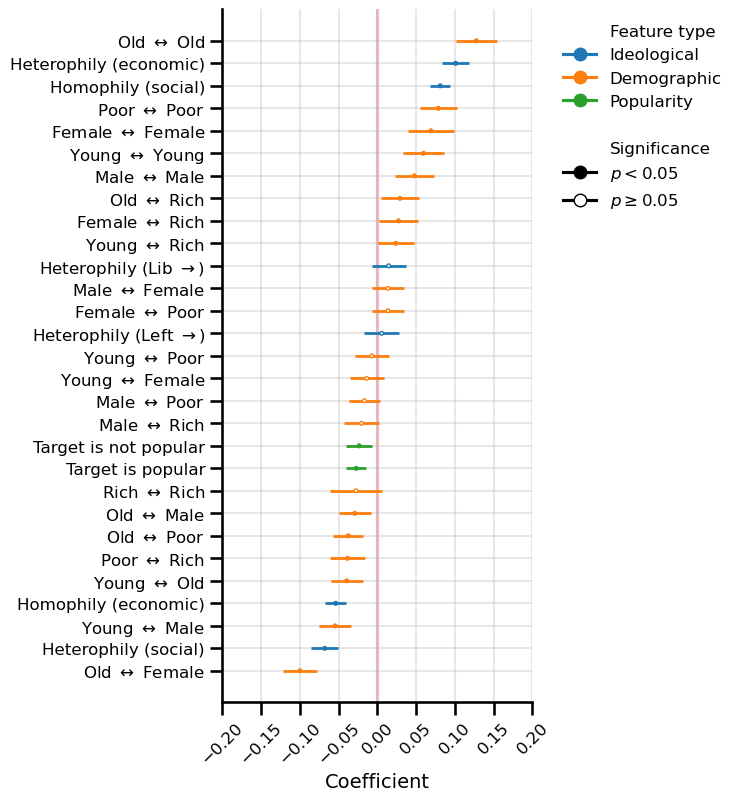

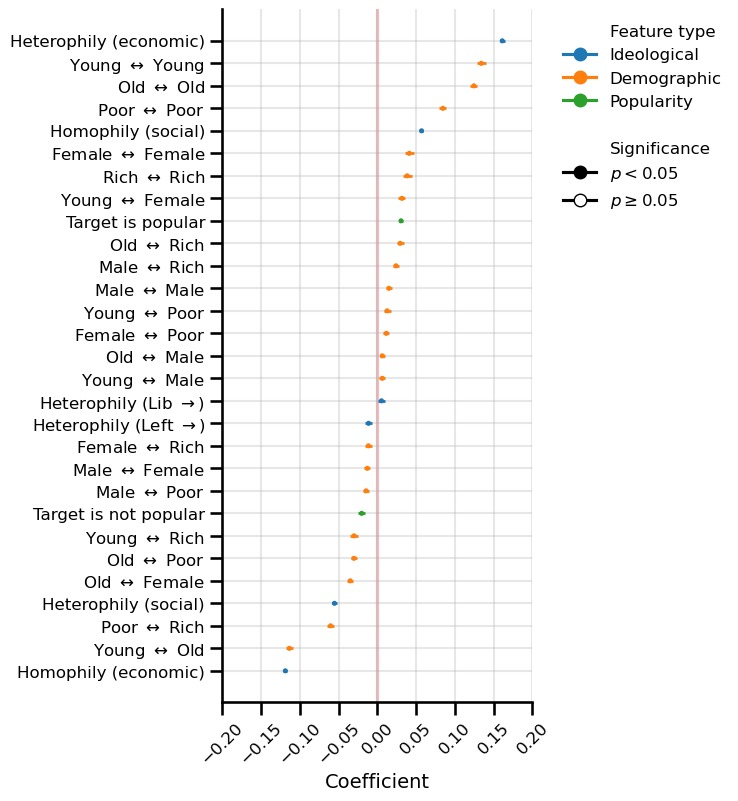

In [10]:
for S in SUBREDDITS:
    fig, ax = plt.subplots(figsize=(4,9))
    ax.errorbar(toplot[S]['coefficient'], toplot[S]['feature_name'], xerr=(toplot[S]['coefficient']-toplot[S]['conf_int_lower']),
                fmt="o", color='white', ecolor=toplot[S]['col'], linewidth=2, markersize=0, zorder=3)
    ax.scatter(toplot[S]['coefficient'], toplot[S]['feature_name'],
               facecolors=toplot[S]['facecolor'],
               color=toplot[S]['col'],
               linewidth=1, s=7, zorder=3)
    ax.axvline(0.0, alpha=0.3, c='tab:red', zorder=0)
    
    start, end = -0.2, 0.2
    ax.xaxis.set_ticks(np.arange(start, end+0.05, 0.05))
    ax.tick_params(axis='x', labelrotation=45)


    plt.xlabel('Coefficient')
    plt.grid(True, alpha=0.3, zorder=0)

    sns.despine(right=True)

    legend_elements = [ Line2D([0], [0], marker=' ', alpha=0, label='Feature type'),
                        Line2D([0], [0], marker='o', color=blu, label='Ideological'),
                        Line2D([0], [0], marker='o', color=orange, label='Demographic'),
                        Line2D([0], [0], marker='o', color=green, label='Popularity'),
                        Line2D([0], [0], marker=' ', alpha=0, label=''),
                        Line2D([0], [0], marker=' ', alpha=0, label='Significance'),
                        Line2D([0], [0], marker='o', color='k', label='$p < 0.05$'),
                        Line2D([0], [0], marker='o', color='k', markerfacecolor='w', 
                               label='$p \geq 0.05$'),
                      ]

    # Create the figure
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0)

    #plt.savefig(FIGURES_PATH + f"3_features_importance_{SUBREDDITS[S]}.pdf", bbox_inches='tight')
    plt.show()